# Analysis freMTPL2freq and enrichment Gender
This notebook should be regarded as a closed notebook, which serves exclusively to enrich the existing data set for further work. Further analyses will then be carried out on the data set created in this notebook. The original data set freMTPL2freq (download link: https://www.kaggle.com/datasets/floser/french-motor-claims-datasets-fremtpl2freq).

The following enrichments were carried out:
1. claims: A new target variable Claims is determined from ClaimNb as follows: df['Claims'] = np.where(df.ClaimNb == 0, 0, 1), in words: insurance claim Yes or No. This makes it possible to use a significantly larger number of metrics to analyze bias and discrimination, since many metrics are currently only applicable to binary target variables. In addition, there are relatively few data sets that have an insurance case at all (~5%)
2. sexNeutral: neutral distribution of sex (~50% women (characteristic 1))
3. sexVP: manipulation of the distribution of sexNeutral as a function of VehPower, assuming that the greater VehPower, the greater the proportion of men
4. claimsVP: Manipulation of the distribution of claims as a function of VehPower, under the assumption: the greater VehPower, the greater the proportion of claims

Due to the indirect correlation between ClaimsVP and SexVP, we hope that the modeling of the target variable VehPower represents a bias for men. Large correlations were deliberately implemented, which do not correspond to reality, but are more suitable for the purposes of further analyses.

In [1]:
import pandas as pd
import numpy as np
import scikitplot as skplt
import math
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz
from pathlib import Path
import warnings 
warnings. filterwarnings('ignore')

In [2]:
df = pd.read_csv("Insert link here/freMTPL2freq.csv", sep=",", decimal=',')

In [3]:
df.dtypes

IDpol         float64
ClaimNb         int64
Exposure       object
Area           object
VehPower        int64
VehAge          int64
DrivAge         int64
BonusMalus      int64
VehBrand       object
VehGas         object
Density         int64
Region         object
dtype: object

In [4]:
df['Exposure'] = df['Exposure'].astype('float64')

In [5]:
cat_var = ['VehPower', 'Area', 'VehBrand', 'VehGas', 'Region']

In [6]:
for col in cat_var:
    print(col)
    print(df[col].value_counts())

VehPower
6     148976
7     145401
5     124821
4     115349
8      46956
10     31354
9      30085
11     18352
12      8214
13      3229
15      2926
14      2350
Name: VehPower, dtype: int64
Area
C    191880
D    151596
E    137167
A    103957
B     75459
F     17954
Name: Area, dtype: int64
VehBrand
B12    166024
B1     162736
B2     159861
B3      53395
B5      34753
B6      28548
B4      25179
B10     17707
B11     13585
B13     12178
B14      4047
Name: VehBrand, dtype: int64
VehGas
Regular    345877
Diesel     332136
Name: VehGas, dtype: int64
Region
R24    160601
R82     84752
R93     79315
R11     69791
R53     42122
R52     38751
R91     35805
R72     31329
R31     27285
R54     19046
R73     17141
R41     12990
R25     10893
R26     10492
R23      8784
R22      7994
R83      5287
R74      4567
R94      4516
R21      3026
R42      2200
R43      1326
Name: Region, dtype: int64


In [7]:
for col in cat_var:
    df[col] = df[col].astype('category')

In [8]:
df.describe()

,IDpol,ClaimNb,Exposure,VehAge,DrivAge,BonusMalus,Density
count,6.780130e+05,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000
mean,2.621857e+06,0.053247,0.528750,7.044265,45.499122,59.761502,1792.422405
std,1.641783e+06,0.240117,0.364442,5.666232,14.137444,15.636658,3958.646564
min,1.000000e+00,0.000000,0.002732,0.000000,18.000000,50.000000,1.000000
25%,1.157951e+06,0.000000,0.180000,2.000000,34.000000,50.000000,92.000000
50%,2.272152e+06,0.000000,0.490000,6.000000,44.000000,50.000000,393.000000
75%,4.046274e+06,0.000000,0.990000,11.000000,55.000000,64.000000,1658.000000
max,6.114330e+06,16.000000,2.010000,100.000000,100.000000,230.000000,27000.000000


In [9]:
df.dtypes

IDpol          float64
ClaimNb          int64
Exposure       float64
Area          category
VehPower      category
VehAge           int64
DrivAge          int64
BonusMalus       int64
VehBrand      category
VehGas        category
Density          int64
Region        category
dtype: object

In [10]:
df.tail(10)

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
678003,6114321.0,0,0.005479,E,4,0,29,80,B12,Regular,5360,R11
678004,6114322.0,0,0.005479,E,11,0,49,74,B12,Diesel,5360,R11
678005,6114323.0,0,0.005479,D,4,0,34,80,B12,Regular,731,R82
678006,6114324.0,0,0.005479,D,11,0,41,50,B12,Diesel,528,R93
678007,6114325.0,0,0.005479,E,6,4,40,68,B12,Regular,2733,R93
678008,6114326.0,0,0.002740,E,4,0,54,50,B12,Regular,3317,R93
678009,6114327.0,0,0.002740,E,4,0,41,95,B12,Regular,9850,R11
678010,6114328.0,0,0.002740,D,6,2,45,50,B12,Diesel,1323,R82
678011,6114329.0,0,0.002740,B,4,0,60,50,B12,Regular,95,R26
678012,6114330.0,0,0.002740,B,7,6,29,54,B12,Diesel,65,R72


<Axes: >

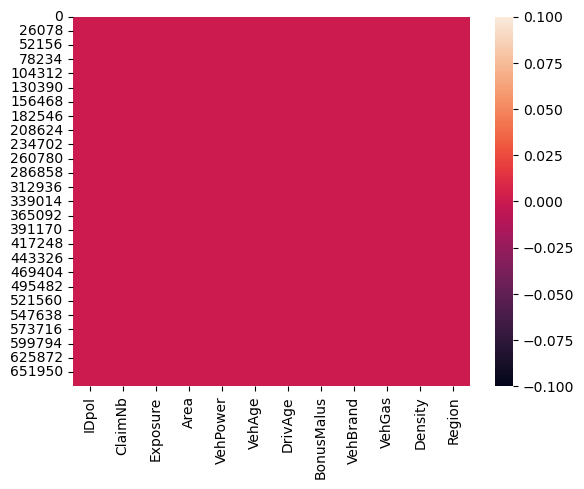

In [11]:
sns.heatmap(df.isnull())

In [12]:
f'Im Datensatz befinden sich insgesamt {df.isnull().sum().sum()} NaN Daten. Der Datensatz besteht aus {df.shape[0]} Zeilen.'

'Im Datensatz befinden sich insgesamt 0 NaN Daten. Der Datensatz besteht aus 678013 Zeilen.'

### Descriptive analysis
As there are very few insurance claims overall, ClaimNb is reduced to 1 or 0. This allows significantly more metrics to be used to determine bias and discrimination, as many procedures are based on classifications. In addition, a “neutral” gender is introduced.

In [13]:
df['Claims'] = np.where(df.ClaimNb == 0, 0, 1)

In [14]:
sex = np.random.uniform(low=0.0, high=1, size=df.shape[0]).round(decimals=0)
df['SexNeutral'] = sex
print(df['SexNeutral'].value_counts(normalize = True))

1.0    0.500011
0.0    0.499989
Name: SexNeutral, dtype: float64


In [15]:
# Erstellung der gruppierte numerischen Features
df["VehAgeGroup"] = pd.cut(df.VehAge, bins=[0, 10, 20, df.VehAge.max()+1], right=False, include_lowest=True)
df["DrivAgeGroup"] = pd.cut(df.DrivAge, bins=[18, 30, 50, 70, df.DrivAge.max()+1], right=False, include_lowest=True)
df["DensityGroup"] = np.round(np.log(df.Density),0).astype(int)

# Variablen die auszugeben sind
Variables = ["Area", "VehPower", "VehAgeGroup", "VehBrand", "VehGas", "DensityGroup", "DrivAgeGroup", "SexNeutral", "Region"]
# Grundvariable
base = "Claims"

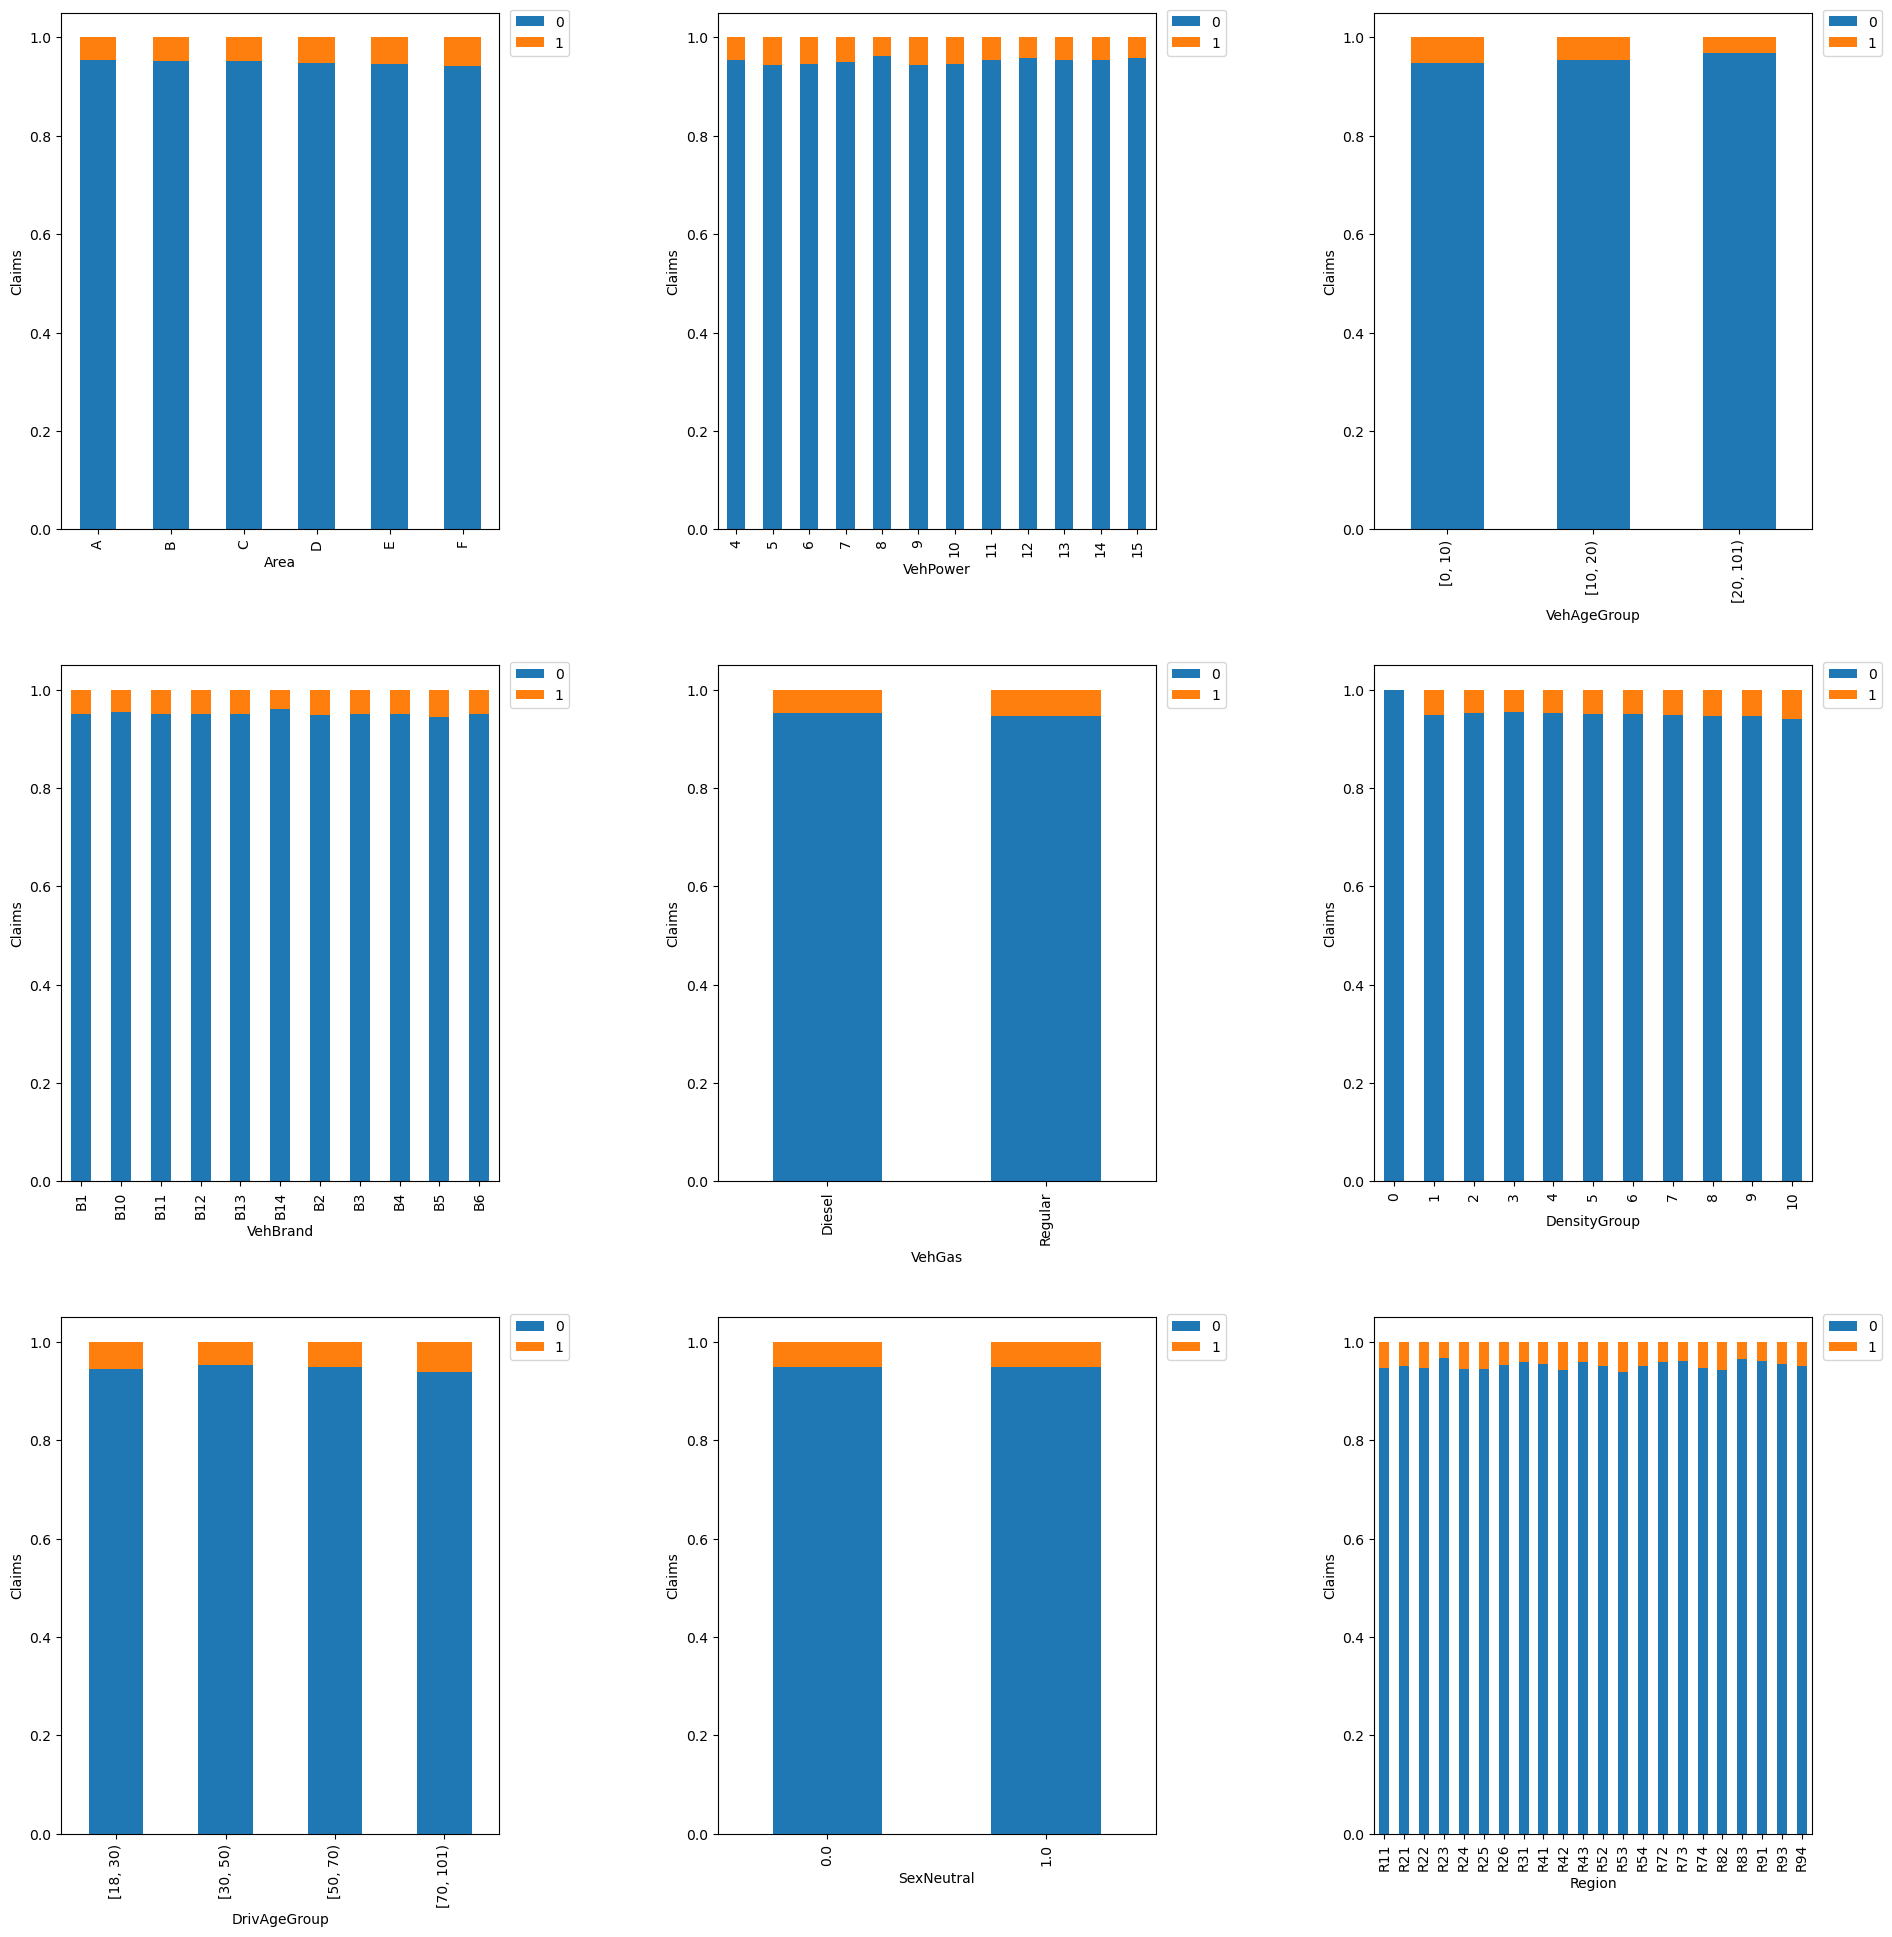

In [16]:
# Ausgabe in relativen Häufigkeiten mit dem jeweiligen Feature als Basis
fig1, axes = plt.subplots(ncols=3, nrows=3, figsize=(24, 24))
for i, ax in enumerate(axes.ravel()):
    what = Variables[i]
    stack = df.groupby([what, base])[["IDpol"]].count()
    stack["Gesamt"] = stack.groupby(what).transform(lambda x: x.sum())
    stack["Anteil"] = stack.IDpol / stack.Gesamt
    stack = stack.reset_index().pivot(what, base, "Anteil")
    stack.plot(kind="bar", stacked=True, ax=ax)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, 0.8*box.width, 0.95*box.height])
    ax.legend(bbox_to_anchor=(1.01, 1.02))
    ax.set_ylabel(base)

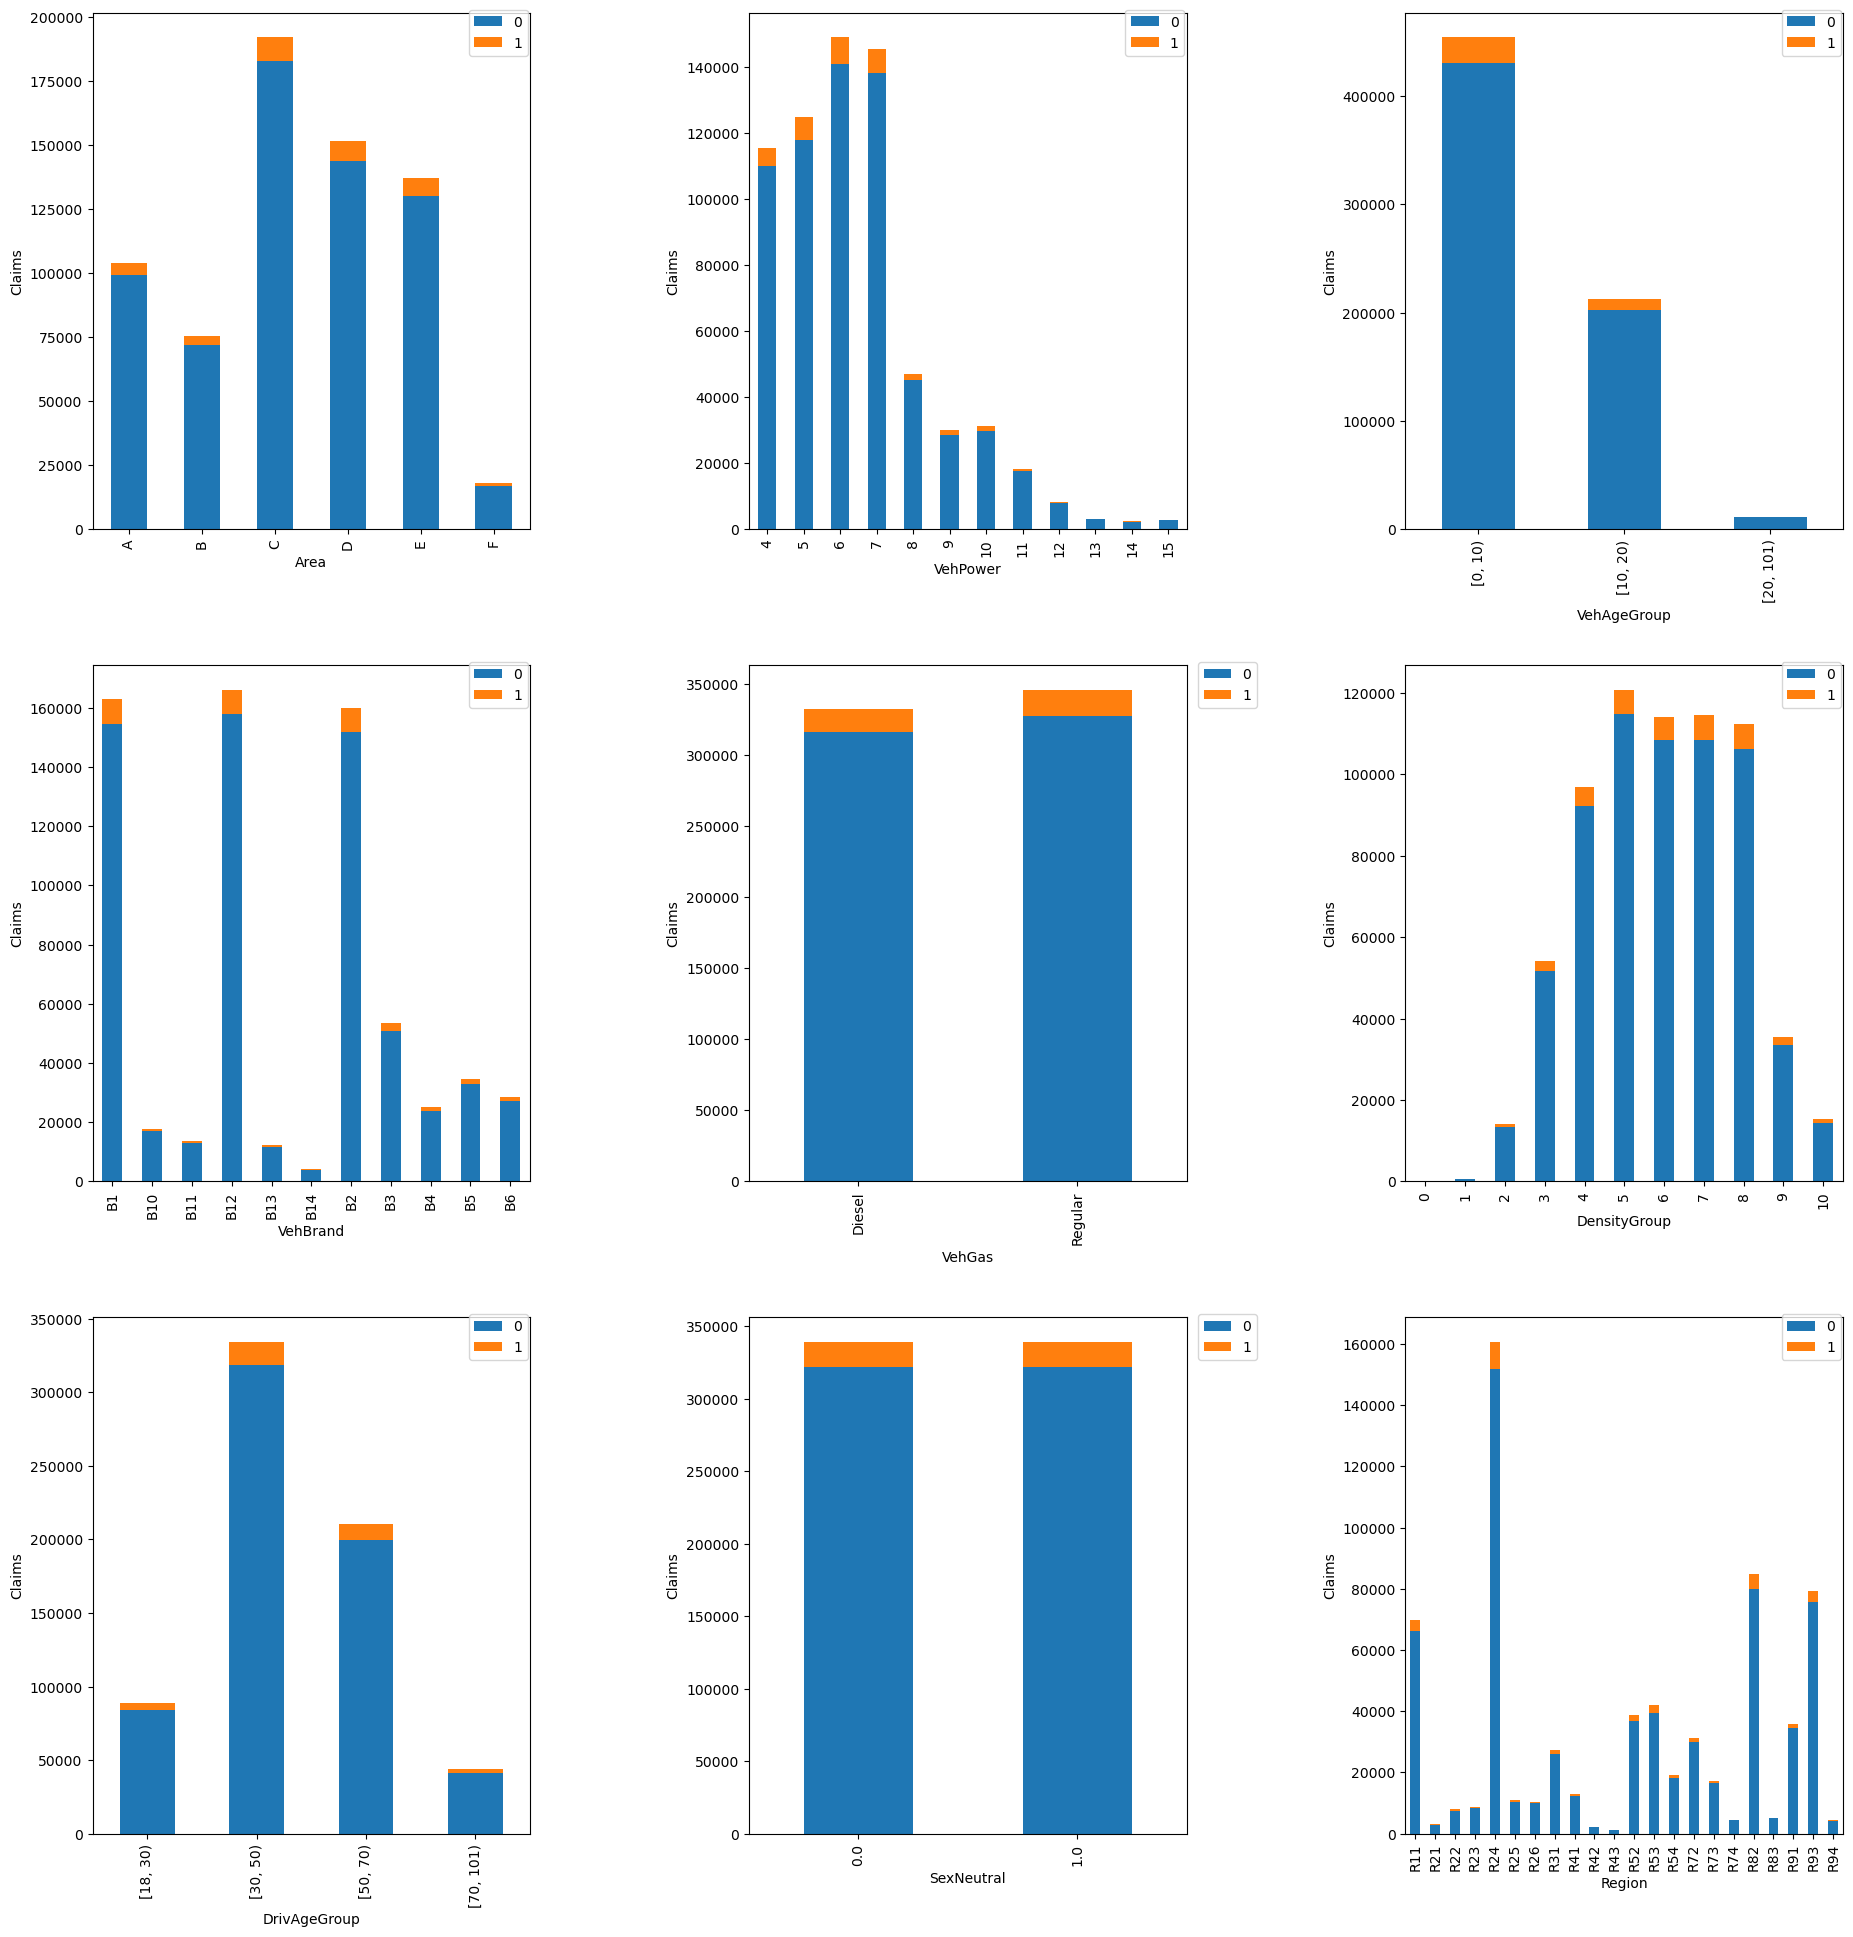

In [17]:
# Ausgabe in absoluten Häufigkeiten mit den jeweiligen Feature als Basis
fig1, axes = plt.subplots(ncols=3, nrows=3, figsize=(24, 24))
for i, ax in enumerate(axes.ravel()):
    what = Variables[i]
    stack = df.groupby([what, base])[["IDpol"]].count()
    stack["Gesamt"] = stack.groupby(base).transform(lambda x: x.sum())
    stack["Anteil"] = stack.IDpol
    stack = stack.reset_index().pivot(what, base, "Anteil")
    stack.plot(kind="bar", stacked=True, ax=ax)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, 0.8*box.width, 0.95*box.height])
    ax.legend(bbox_to_anchor=(1.01, 1.02))
    ax.set_ylabel(base)

In [18]:
print(df['VehPower'].value_counts())

6     148976
7     145401
5     124821
4     115349
8      46956
10     31354
9      30085
11     18352
12      8214
13      3229
15      2926
14      2350
Name: VehPower, dtype: int64


### Gender manipulation

In [19]:
df['SexVP'] = sex

In the for loop, a normal distribution is made for the gender per characteristic of VehPower and rounded so that only 0 and 1 come out. The range was adjusted so that the greater the VehPower, the greater the proportion of men. Technical: Starting value “dec” is reduced by 0.1 with each run. 

Care was taken to ensure that in the end the distribution in SexVP is similar to that in SexNeutral (achieved by trying out different starting values for “dec”). 

In [20]:
dec = 1.3
for i in sorted(df['VehPower'].unique()):
    df.loc[df['VehPower'] == i, 'SexVP'] = np.random.uniform(low=0.0, high=dec, size=df.loc[df['VehPower'] == i, 'SexVP'].shape[0]).round(decimals=0)
    dec=dec-0.1
    dec=max(dec,0)

In [21]:
df.groupby('VehPower')['SexVP'].value_counts(normalize = True)

VehPower  SexVP
4         1.0      0.615610
          0.0      0.384390
5         1.0      0.584293
          0.0      0.415707
6         1.0      0.546155
          0.0      0.453845
7         0.0      0.501111
          1.0      0.498889
8         0.0      0.555563
          1.0      0.444437
9         0.0      0.623700
          1.0      0.376300
10        0.0      0.714773
          1.0      0.285227
11        0.0      0.830918
          1.0      0.169082
12        0.0      1.000000
13        0.0      1.000000
14        0.0      1.000000
15        0.0      1.000000
Name: SexVP, dtype: float64

In [22]:
print(df['SexVP'].value_counts(normalize = True))

1.0    0.504535
0.0    0.495465
Name: SexVP, dtype: float64


In [23]:
print(df['SexNeutral'].value_counts(normalize = True))

1.0    0.500011
0.0    0.499989
Name: SexNeutral, dtype: float64


In [24]:
base = ["SexNeutral", "SexVP"]

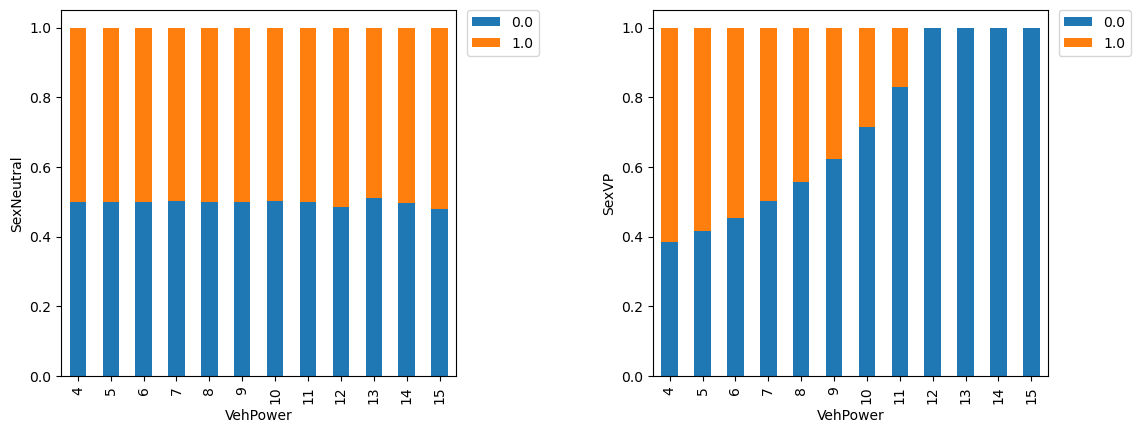

In [25]:
# Ausgabe in relativen Häufigkeiten mit dem jeweiligen Feature als Basis
fig1, axes = plt.subplots(ncols=2, nrows=1, figsize=(14, 5))
for i, ax in enumerate(axes.ravel()):
    what = "VehPower"
    stack = df.groupby([what, base[i]])[["IDpol"]].count()
    stack["Gesamt"] = stack.groupby(what).transform(lambda x: x.sum())
    stack["Anteil"] = stack.IDpol / stack.Gesamt
    stack = stack.reset_index().pivot(what, base[i], "Anteil")
    stack.plot(kind="bar", stacked=True, ax=ax)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, 0.8*box.width, 0.95*box.height])
    ax.legend(bbox_to_anchor=(1.01, 1.02))
    ax.set_ylabel(base[i])

#### SexVP correlation to VehPower

In [26]:
np.corrcoef(df['SexVP'], df['VehPower'])

array([[ 1.        , -0.24587978],
       [-0.24587978,  1.        ]])

#### SexNeutral correlation to VehPower

In [27]:
np.corrcoef(df['SexNeutral'], df['VehPower'])

array([[1.        , 0.00112415],
       [0.00112415, 1.        ]])

A correlation between VehPower and SexVP is clearly recognizable.
### Manipulation of Claims
In the next step, the claims are manipulated and correlated with VehPower. Here, too, care was taken to ensure that the overall distribution did not change.

In [28]:
df['ClaimsVP'] = df['Claims']

In [29]:
inc = 0.5
manipulate = "ClaimsVP"
incinterval = [0.01, 0.01, 0.01, 0.01, 0.01, 0.03, 0.03, 0.03, 0.03, 0.05, 0.05,0]
j = 0

In [30]:
for i in sorted(df['VehPower'].unique()):
    df.loc[df['VehPower'] == i, manipulate] = np.random.uniform(low=0.0, high=inc, size=df.loc[df['VehPower'] == i, manipulate].shape[0]).round(decimals=0)
    inc=inc+incinterval[j]
    j = j+1

In [31]:
print(np.mean(df.loc[df["SexVP"] == 1,"ClaimsVP"]))
print(np.mean(df.loc[df["SexVP"] == 0,"ClaimsVP"]))

0.037982232278320045
0.06423323767905409


Subsequent analyses showed that the addition of 50 additional losses in women significantly improved the quality and explainability of the results. As the damages are synthetically enriched anyway, the increase from 5% to 6% overall damage rate is unproblematic.

In [32]:
df2 = df.copy()

df2["r"] = np.random.randint(1, 50, df2.shape[0])

#noch ein paar schäden reinnehmen
df2["ClaimsVPNew"] = np.where((df2["SexVP"] == 1) & (df2["ClaimsVP"] == 0) & (df2["r"]==1) , 1 , 0) + df2["ClaimsVP"]

print(np.mean(df2.loc[df2["SexVP"] == 1,"ClaimsVPNew"]))
print(np.mean(df2.loc[df2["SexVP"] == 0,"ClaimsVPNew"]))
print(df2['ClaimsVPNew'].value_counts(normalize = True))

0.05744253553982829
0.06423323767905409
0    0.939193
1    0.060807
Name: ClaimsVPNew, dtype: float64


In [33]:
##Alles aufräumen
df2["ClaimsVP"]  = df2["ClaimsVPNew"] 
df = df2.drop(['r','ClaimsVPNew'],axis=1)

#Check:
print(np.mean(df.loc[df["SexVP"] == 1,"ClaimsVP"]))
print(np.mean(df.loc[df["SexVP"] == 0,"ClaimsVP"]))

0.05744253553982829
0.06423323767905409


In [34]:
print(df['Claims'].value_counts(normalize = True))

0    0.949765
1    0.050235
Name: Claims, dtype: float64


In [35]:
print(df['ClaimsVP'].value_counts(normalize = True))

0    0.939193
1    0.060807
Name: ClaimsVP, dtype: float64


In [36]:
df.groupby('VehPower')['ClaimsVP'].value_counts(normalize = True)

VehPower  ClaimsVP
4         0           0.987820
          1           0.012180
5         0           0.968467
          1           0.031533
6         0           0.950361
          1           0.049639
7         0           0.934533
          1           0.065467
8         0           0.916454
          1           0.083546
9         0           0.902210
          1           0.097790
10        0           0.857977
          1           0.142023
11        0           0.821164
          1           0.178836
12        0           0.777697
          1           0.222303
13        0           0.747910
          1           0.252090
14        0           0.692766
          1           0.307234
15        0           0.654477
          1           0.345523
Name: ClaimsVP, dtype: float64

In [37]:
base = ["Claims", "ClaimsVP"]

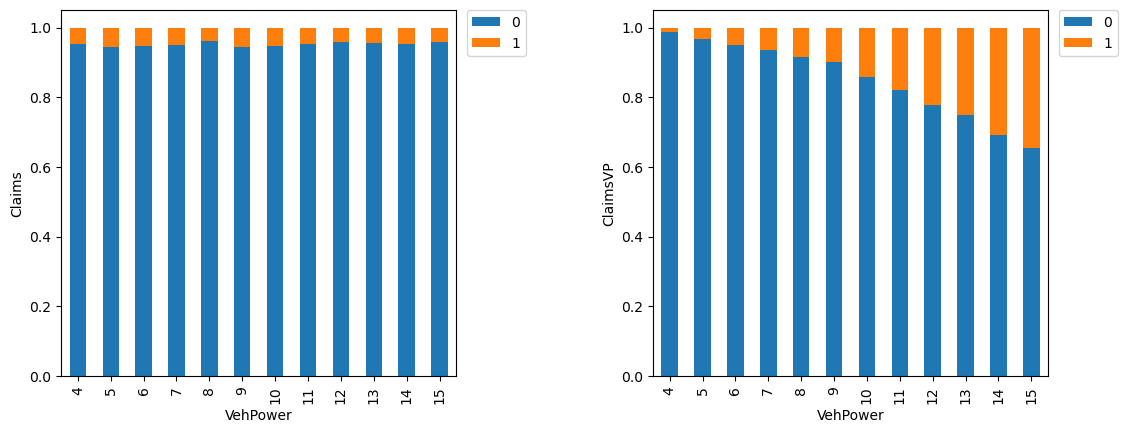

In [38]:
# Ausgabe in relativen Häufigkeiten mit dem jeweiligen Feature als Basis
fig1, axes = plt.subplots(ncols=2, nrows=1, figsize=(14, 5))
for i, ax in enumerate(axes.ravel()):
    what = "VehPower"
    stack = df.groupby([what, base[i]])[["IDpol"]].count()
    stack["Gesamt"] = stack.groupby(what).transform(lambda x: x.sum())
    stack["Anteil"] = stack.IDpol / stack.Gesamt
    stack = stack.reset_index().pivot(what, base[i], "Anteil")
    stack.plot(kind="bar", stacked=True, ax=ax)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, 0.8*box.width, 0.95*box.height])
    ax.legend(bbox_to_anchor=(1.01, 1.02))
    ax.set_ylabel(base[i])

#### ClaimsVP correlation to VehPower

In [39]:
np.corrcoef(df['ClaimsVP'], df['VehPower'])

array([[1.        , 0.19997381],
       [0.19997381, 1.        ]])

#### Claims correlation to VehPower

In [40]:
np.corrcoef(df['Claims'], df['VehPower'])

array([[ 1.        , -0.00392034],
       [-0.00392034,  1.        ]])

A correlation between ClaimsVP and VehPower is clearly recognizable.

In [41]:
np.corrcoef(df['ClaimsVP'], df['SexVP'])

array([[ 1.        , -0.01420732],
       [-0.01420732,  1.        ]])

In [1]:
filepath = Path('Insert link here/freMTPL2freq_VP.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  

NameError: name 'Path' is not defined

In [43]:
df = df.drop(['IDpol','ClaimNb','Claims','SexNeutral','VehAgeGroup', 'DrivAgeGroup', 'DensityGroup'], axis=1)

In [44]:
df.to_csv(filepath, index=False)

A correlation between ClaimsVP and VehPower is clearly recognizable. 